# PACT

In [23]:
import numpy as np
from numpy.lib import scimath
from scipy import integrate
import matplotlib.pyplot as plt

## pa_plane()

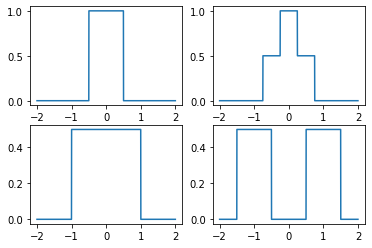

In [3]:
vs = 1500
A = 1
d = 1
z = np.linspace(-2, 2, 1000)
h = np.heaviside

def p0(z):
    return A * h(z + d/2, 1) * h(-z + d/2, 1)

def p(z, t):
    return 1/2 * p0(z - vs * t) + 1/2 * p0(z + vs * t)

plt.figure()
for i, t in zip(np.arange(1, 5), np.array([0, 0.25, 0.5, 1]) / vs):
    plt.subplot(2, 2, i)
    plt.plot(z, p(z, t))
plt.show()

## pa_sphere()

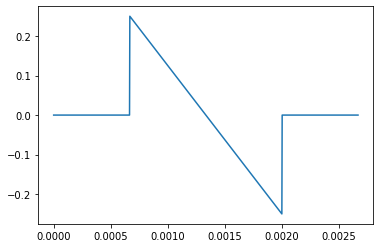

In [4]:
vs = 1500
A = 1
R = 1
r = 2
t = np.linspace(0, 4, 1000) / vs
h = np.heaviside

def p0(r):
    return A * h(r, 1) * h(-r + R, 1)

def p(r, t):
    return (r + vs * t) / 2 / r * p0(r + vs * t) + \
        (r - vs * t) / 2 / r * p0(-r + vs * t) + \
        (r - vs * t) / 2 / r * p0(r - vs * t)

plt.figure()
plt.plot(t, p(r, t))
plt.show()

## pa_cylinder()

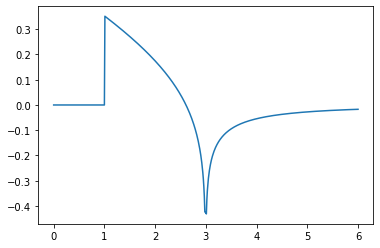

In [68]:
vs = 1500.0
p0 = 1.0
R = 0.5e-3
p = []
N = 1000

L = 2 * R
dvt = R / 100
vt1 = np.linspace(0, L - R, 101)
vt2 = np.linspace(L - R + dvt, L + R - dvt, 199)
vt3 = np.linspace(L + R + dvt, 3 * L, 300)

t = np.hstack([vt1, vt2, vt3])
p1 = vt1 * 0
p2 = vt2 * 0
p3 = vt3 * 0

n2 = len(vt2)
n3 = len(vt3)

# When L - R < vt < L + R
p2_temp = p2  # 初始化必须写在循环外面！写在循环里面会重复初始化！
for n in range(n2):
    vt = vt2[n]
    integral_min = (L - R) / vt
    integral_max = (L**2 + vt**2 - R**2) / (2 * L * vt)

    def y(x):
        return np.arctan(np.abs(scimath.sqrt(
            (R**2 - (L-vt*x)**2) / (L**2 + vt**2 - 2*L*vt*x - R**2)
        )))

    temp, _ = integrate.quad(y, integral_min, integral_max)
    temp *= 4 * vt**2
    p2_temp[n] = (temp + np.pi * vt / L * (R**2 - (L - vt)**2)) / vt

p2 = np.diff(p2_temp, axis=0) / dvt / (4 * np.pi)
p2 = np.append(p2, p2[n2 - 2])

# When vt > L + R
p3_temp = p3
for n in range(n3):
    vt = vt3[n]
    integral_min = (L - R) / vt
    integral_max = (L + R) / vt

    def y(x):
        return np.arctan(np.abs(scimath.sqrt(
            (R**2 - (L-vt*x)**2) / (L**2 + vt**2 - 2*L*vt*x - R**2)
        )))
    
    temp, _ = integrate.quad(y, integral_min, integral_max)
    temp *= 4 * vt**2
    p3_temp[n] = temp / vt

p3 = np.diff(p3_temp, axis=0) / dvt / (4 * np.pi)
p3 = np.append(p3, p3[n3 - 2])

p = np.hstack([p1, p2, p3])

plt.plot(t / R, p)
plt.show()